# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow # import library google.colab.patches ในส่วนย่อย cv2_imshow

## Generate my kernel

In [2]:
cross_3x3 = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
print("Kernel (Structuring Element) Cross 3x3")
print(cross_3x3)
rect_3x3 = np.ones((3,3),dtype=np.uint8)
print("Kernel (Structuring Element) Rectangle 3x3")
print(rect_3x3)
eiei_3x3 = np.array([[0,0,0],[0,1,1],[0,1,1]],dtype=np.uint8)
print("Kernel (Structuring Element) My custom 3x3")
print(eiei_3x3)

Kernel (Structuring Element) Cross 3x3
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Kernel (Structuring Element) Rectangle 3x3
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Kernel (Structuring Element) My custom 3x3
[[0 0 0]
 [0 1 1]
 [0 1 1]]


## Use cv.getStructuringElement()

In [3]:
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(rect3x3)
print(cross3x3)
print(ellipse3x3)
print(rect5x5)
print(cross5x5)
print(ellipse5x5)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## Load Circuit Image / Convert2Binary

In [4]:
!wget https://assets.gezdev.com/dip/circles.png #ดาวน์โหลดภาพ

--2022-09-25 07:11:21--  https://assets.gezdev.com/dip/circles.png
Resolving assets.gezdev.com (assets.gezdev.com)... 203.158.180.101
Connecting to assets.gezdev.com (assets.gezdev.com)|203.158.180.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16465 (16K) [image/png]
Saving to: ‘circles.png’

circles.png         100%[===================>]  16.08K  --.-KB/s    in 0s      

2022-09-25 07:11:21 (173 MB/s) - ‘circles.png’ saved [16465/16465]



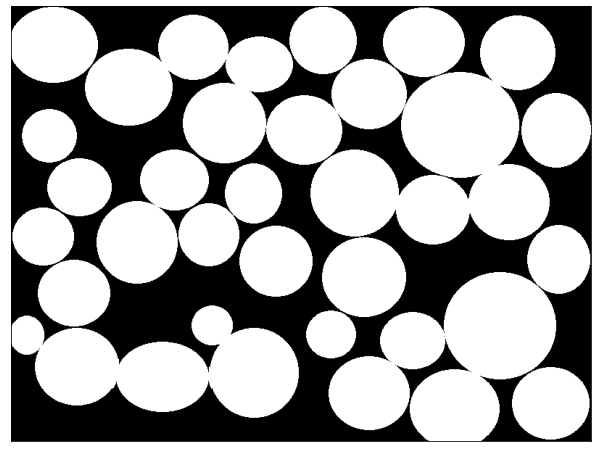

In [5]:
src = cv.imread("./circles.png") #อ่านไฟล์ circles.png และเก็บในตัวแปร src
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY) # แปลงภาพเป็น BGR2GRAY
_,bin_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
plt.rcParams["figure.figsize"] = [15, 8]  #กำหนดขนาดภาพ 15x8
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

##  คำสั่งของ Lab นี้
แยกวงกลมให้ขาดออกจากกันเพื่อให้สามารถนับจำนวนได้ง่าย โดยต้องขาดออกจากกันทุกวง มีโค้งเว้าและขอบคล้ายคลึงวงกลมให้เหมือนเดิมมากที่สุด และวงกลมต้องมีขนาดใหญ่ที่สุดเท่าที่จะเป็นไปได้โดยไม่ติดกัน

In [6]:
eroded_ellipse5x5_img = cv.erode(bin_img, ellipse5x5, iterations = 7)#กัดภาพ ซ้ำ 7รอบ

Original Binary


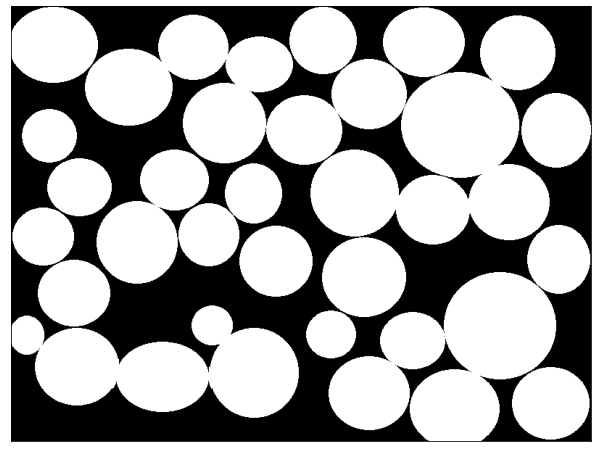

Result from eroded_ellipse5x5


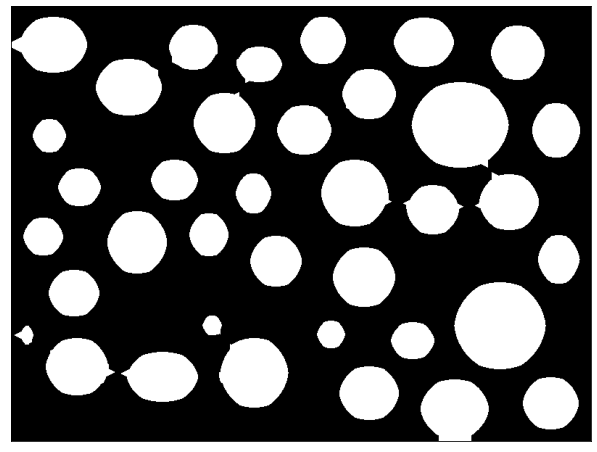

In [7]:
print("Original Binary")
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse5x5")
plt.imshow(eroded_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

**จากการทดลองต้องมีการกัดภาพ 7รอบเพื่อให้วงกลมแยกออกจากกัน**

# Eroded

In [ ]:
#กัดภาพ
eroded_rect5x5_img = cv.erode(bin_img, rect5x5, iterations = 1)
eroded_cross5x5_img = cv.erode(bin_img, cross5x5, iterations = 1)
eroded_ellipse5x5_img = cv.erode(bin_img, ellipse5x5, iterations = 7)

Original Binary


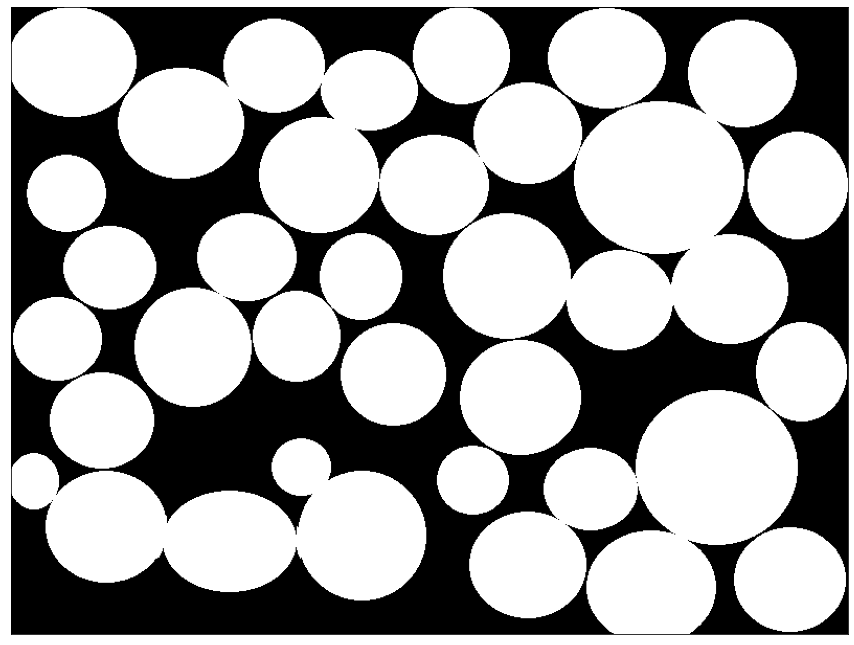

Result from eroded_rect5x5


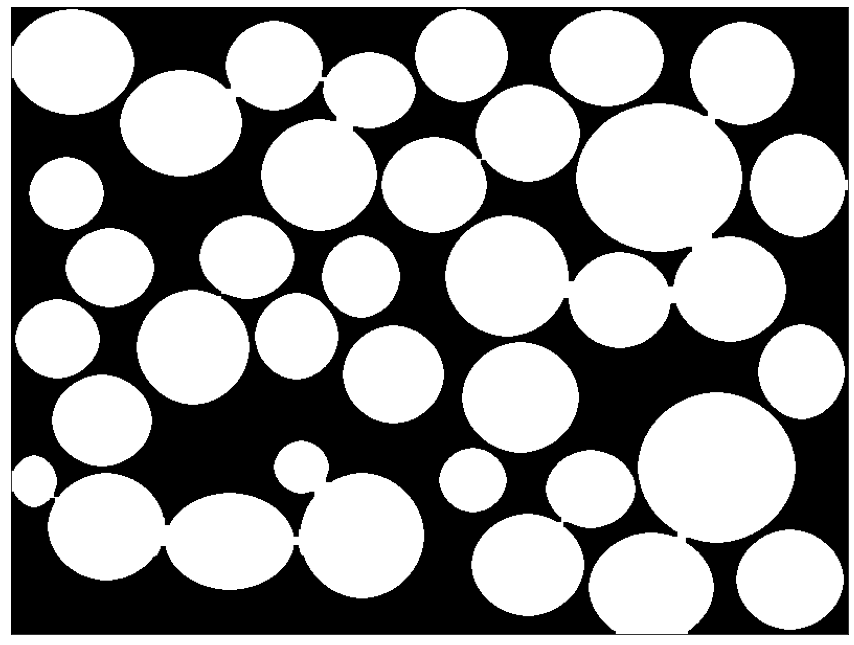

Result from eroded_cross5x5


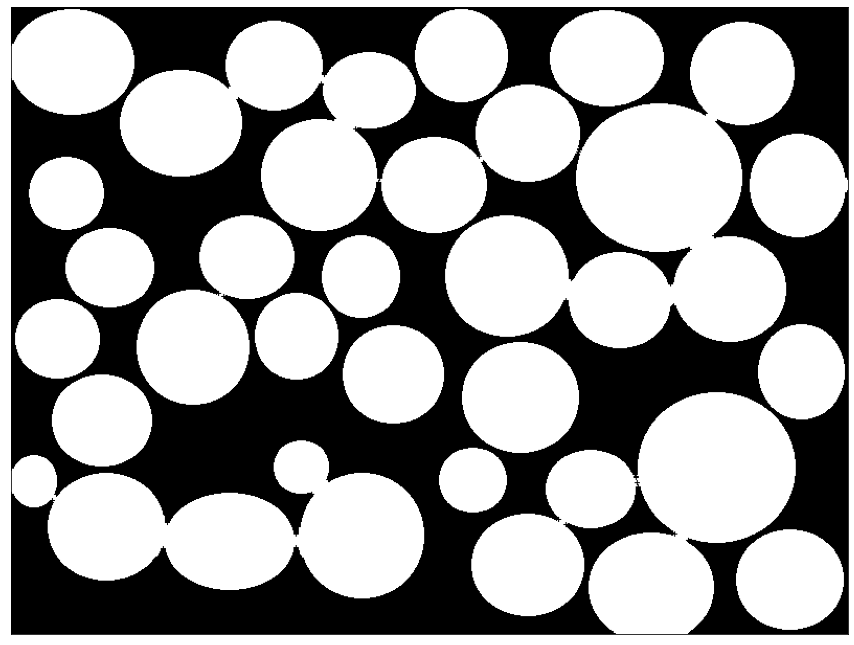

Result from eroded_ellipse5x5


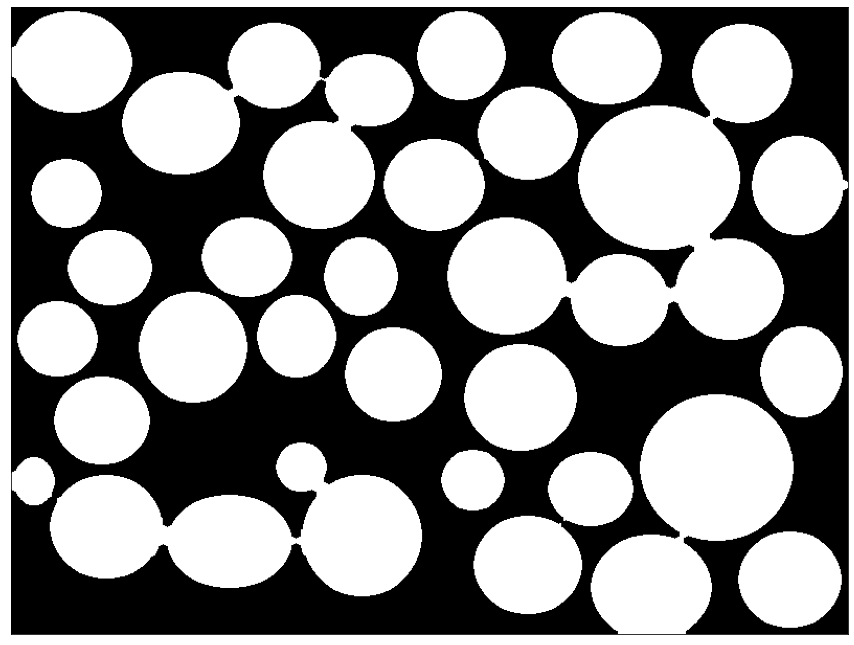

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
print("Original Binary")
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_rect5x5")
plt.imshow(eroded_rect5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_cross5x5")
plt.imshow(eroded_cross5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse5x5")
plt.imshow(eroded_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

# Dilated

In [ ]:
dilated_rect5x5_img = cv.dilate(bin_img, rect5x5, iterations = 1)
dilated_cross5x5_img = cv.dilate(bin_img, cross5x5, iterations = 1)
dilated_ellipse5x5_img = cv.dilate(bin_img, ellipse5x5, iterations = 1)

Original Binary


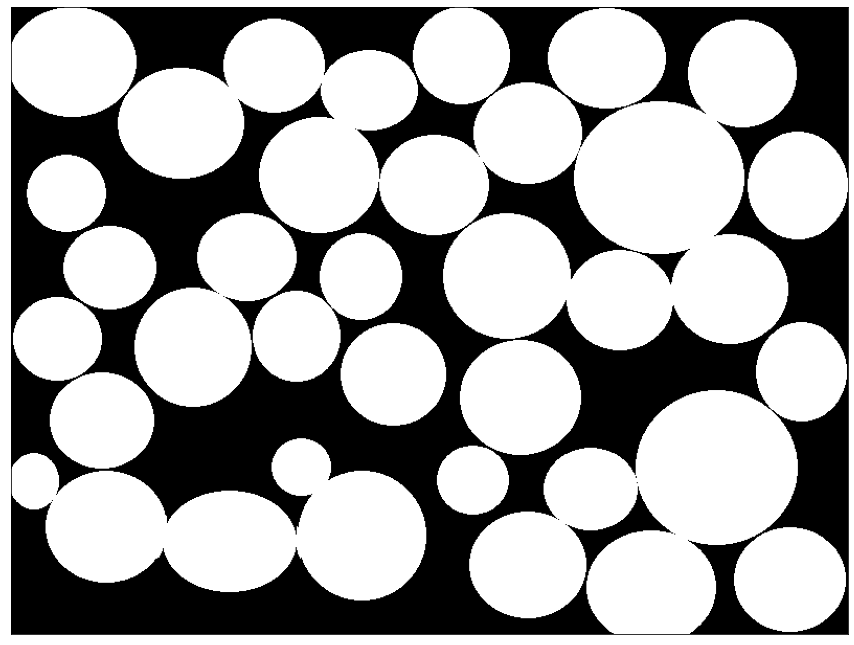

Result from dilated_rect5x5


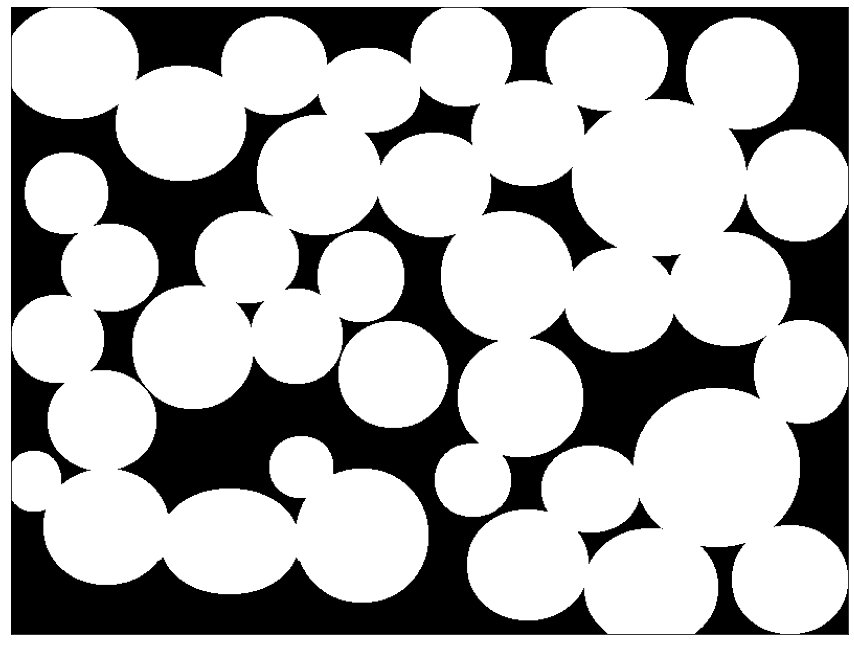

Result from dilated_cross5x5


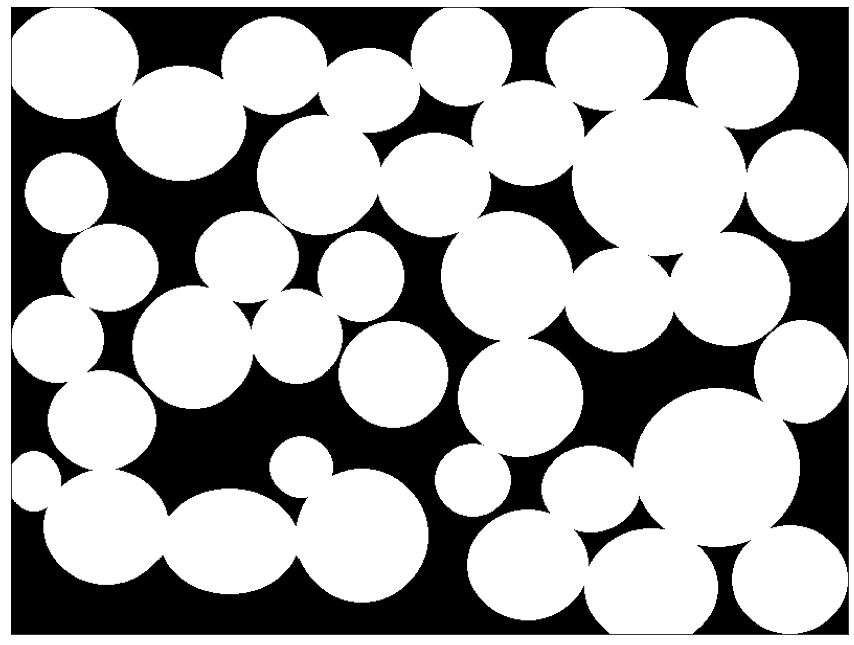

Result from dilated_ellipse5x5


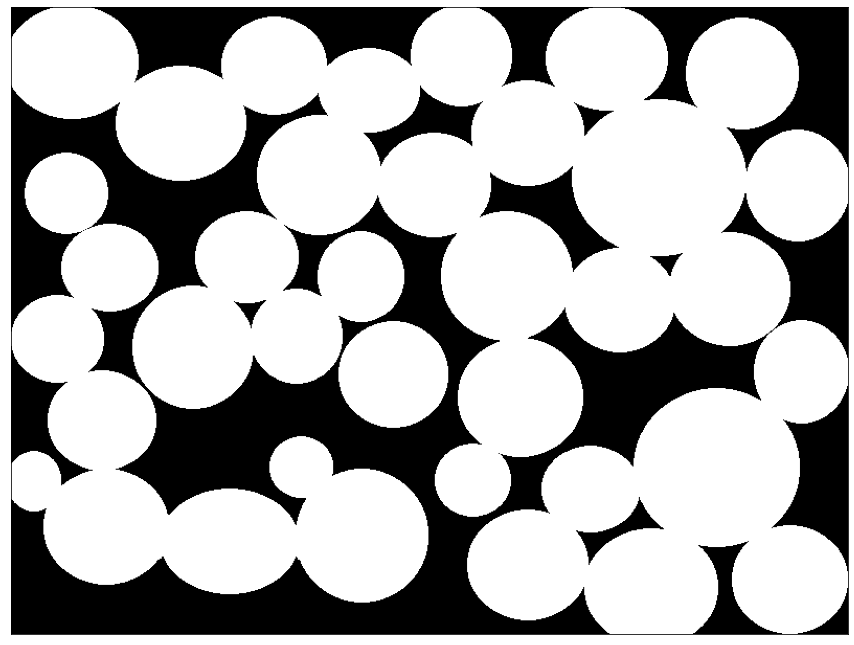

In [ ]:
print("Original Binary")
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilated_rect5x5")
plt.imshow(dilated_rect5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilated_cross5x5")
plt.imshow(dilated_cross5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilated_ellipse5x5")
plt.imshow(dilated_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()